In [1]:
import leaderbot as lb
import numpy
import numpy as np
import matplotlib.pyplot as plt
import texplot
import time
import scipy
import pickle

In [2]:
# Load form file instead
filename = '../benchmark/models_train_full.pkl'
#filename = '../benchmark/models_train_split.pkl'
with open(filename, 'rb') as f:
    results = pickle.load(f)

models = results['models']
names = np.array(results['data']['models'])

In [3]:
model = models[1]

In [45]:
n_param = model.n_param
param = np.random.randn(n_param)

F = model.fisher(param, epsilon=1e-8, order=4)
_, jac = model.loss(param, return_jac=True, constraint=False)

m = names.size
F = F[:m, :m]
jac = jac[:m]

In [46]:
print(np.linalg.matrix_rank(F))
print('%e' % np.linalg.cond(F))

129
1.037318e+09


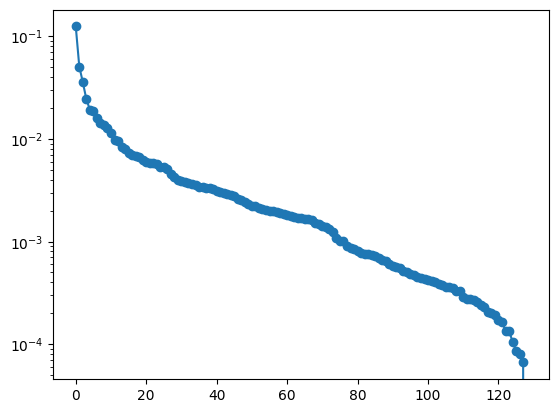

In [47]:
e = np.linalg.eigh(F)[0]
plt.semilogy(-e, '-o')

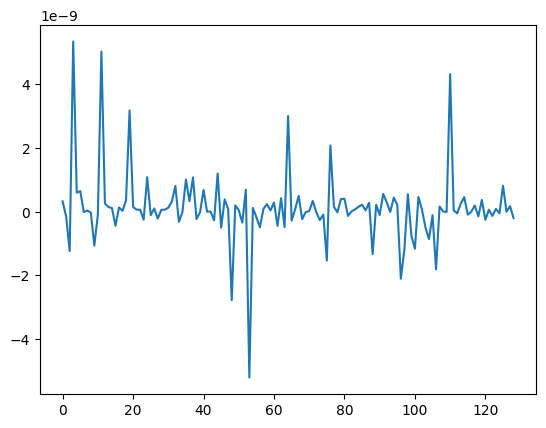

In [48]:
plt.plot(np.sum(F, axis=1))

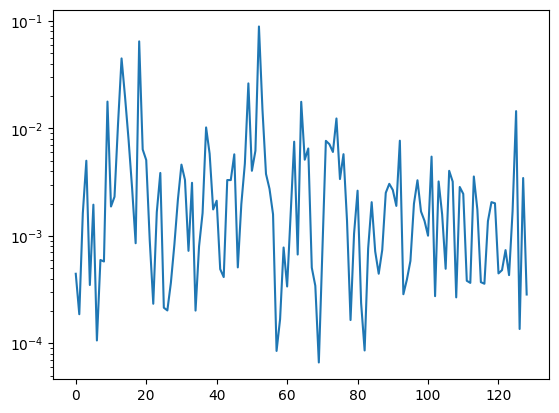

In [49]:
plt.semilogy(-np.diag(F))

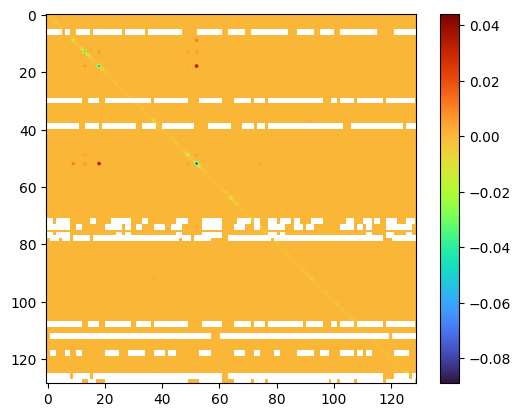

In [51]:
G = np.copy(F)
G[np.abs(G) < 1e-14] = np.nan
p = plt.imshow(G, cmap=plt.cm.turbo)
plt.colorbar(p)

In [52]:
np.sum(jac[:m])

3.469446951953614e-18